In [2]:
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

face_landmarks: landmark {
  x: 0.5539513230323792
  y: 0.5066186785697937
  z: -0.030547009781003
}
landmark {
  x: 0.5554752945899963
  y: 0.4463993012905121
  z: -0.07994771003723145
}
landmark {
  x: 0.5548554062843323
  y: 0.4629039168357849
  z: -0.03650964796543121
}
landmark {
  x: 0.5414007306098938
  y: 0.36951708793640137
  z: -0.0685812458395958
}
landmark {
  x: 0.5553027987480164
  y: 0.42400211095809937
  z: -0.08772304654121399
}
landmark {
  x: 0.5547631978988647
  y: 0.39267250895500183
  z: -0.08493643254041672
}
landmark {
  x: 0.5531845092773438
  y: 0.31526970863342285
  z: -0.05404418334364891
}
landmark {
  x: 0.44013381004333496
  y: 0.30508705973625183
  z: 0.004746405873447657
}
landmark {
  x: 0.5524322986602783
  y: 0.25837385654449463
  z: -0.05141668766736984
}
landmark {
  x: 0.5523797273635864
  y: 0.22736676037311554
  z: -0.05956000089645386
}
landmark {
  x: 0.5517739057540894
  y: 0.10651266574859619
  z: -0.059176377952098846
}
landmark {
  x: 0.55

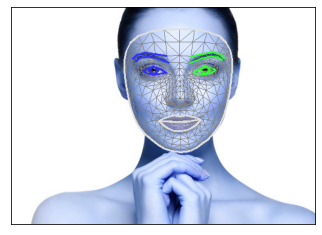

In [4]:

# For static images:
IMAGE_FILES = ["images/face.jpg"]
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print and draw face mesh landmarks on the image.
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      print('face_landmarks:', face_landmarks)
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    cv2.imwrite('/images/annotated_image' + str(idx) + '.png', annotated_image)
    img = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2GRAY)
    # plt.imshow(img)
    plt.imshow(annotated_image)
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()

In [10]:
# For webcam input:
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
cap = cv2.VideoCapture(0)
with mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as face_mesh:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(image)

    # Draw the face mesh annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.multi_face_landmarks:
      for face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_tesselation_style())
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_contours_style())
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_IRISES,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_iris_connections_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Face Mesh', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()

KeyboardInterrupt: 